In [1]:
import librosa
import IPython.display as ipd

In [3]:


# 1. Get the file path to the included audio example
# filename = librosa.util.example_audio_file()


filename = '/Users/petern/Desktop/VIBBIDI/Project/AdHoc/Hamilton/A_Winter_s_Ball.mp3'
y , sr = librosa.load(filename)

print(type(y), type(sr))

print(y.shape, sr)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

/Users/petern/miniconda3/envs/pan-theory/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>
(1541459,) 22050


In [4]:
ipd.Audio(filename)

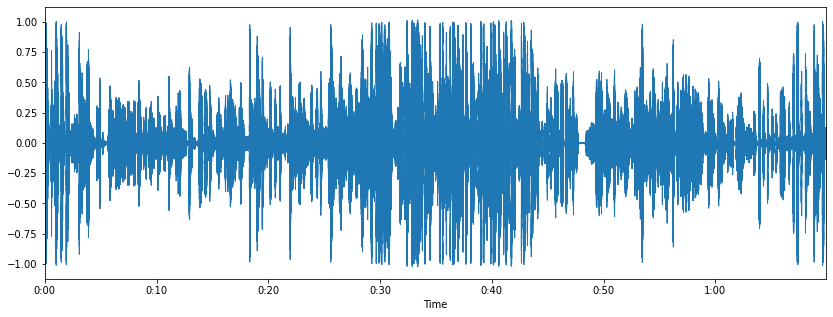

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y , sr=sr)

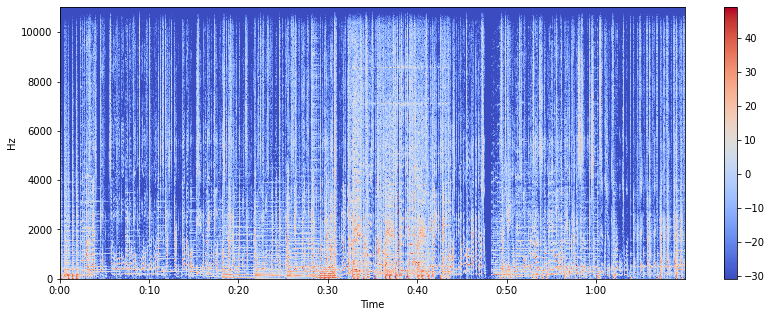

In [7]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()


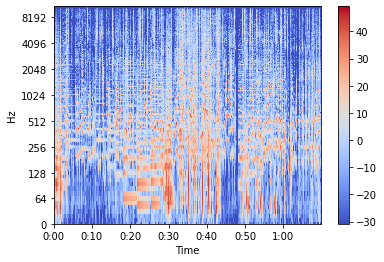

In [8]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
# librosa.output.write_wav('example.wav', y, sr)
# import numpy as np
# sr = 22050 # sample rate
# T = 5.0    # seconds
# t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
# x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
# # Playing the audio
# ipd.Audio(x, rate=sr) # load a NumPy array
# # Saving the audio
# librosa.output.write_wav('tone_220.wav', x, sr)

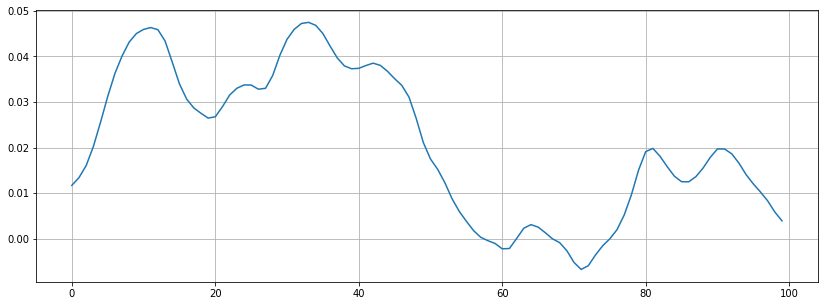

In [9]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])
plt.grid()

In [11]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

4


In [ ]:
# Spectral centroid of metal music at the end while blue is at the middle
# spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
# spectral_centroids.shape
# (775,)
# # Computing the time variable for visualization
# frames = range(len(spectral_centroids))
# t = librosa.frames_to_time(frames)
# # Normalising the spectral centroid for visualisation
# def normalize(x, axis=0):
#     return sklearn.preprocessing.minmax_scale(x, axis=axis)
# #Plotting the Spectral Centroid along the waveform
# librosa.display.waveplot(x, sr=sr, alpha=0.4)
# plt.plot(t, normalize(spectral_centroids), color='r')

In [ ]:
# spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
# librosa.display.waveplot(x, sr=sr, alpha=0.4)
# plt.plot(t, normalize(spectral_rolloff), color='r')

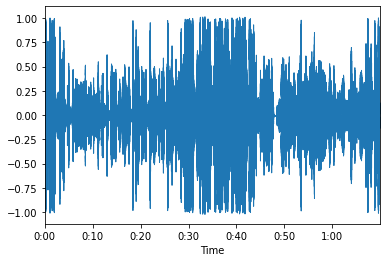

In [12]:
librosa.display.waveplot(y, sr=sr)

(20, 3011)


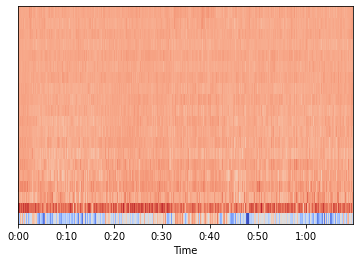

In [13]:
mfccs = librosa.feature.mfcc(y, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')



[-5.06768139e-09  0.00000000e+00 -3.80076104e-09 -2.53384069e-09
 -2.53384069e-09  0.00000000e+00 -5.06768139e-09  1.01353628e-08
 -1.26692035e-08  2.02707255e-08 -1.01353628e-08  1.01353628e-08
 -1.52030442e-08  2.53384069e-09  1.26692035e-09 -1.01353628e-08
  0.00000000e+00  0.00000000e+00 -5.06768139e-09  1.01353628e-08]
[1.         1.         1.         1.         1.         0.9999998
 0.99999994 1.         1.         1.         1.0000001  0.99999994
 1.         1.         1.0000001  1.         1.0000001  0.9999998
 1.         1.        ]


/Users/petern/miniconda3/envs/pan-theory/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/petern/miniconda3/envs/pan-theory/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


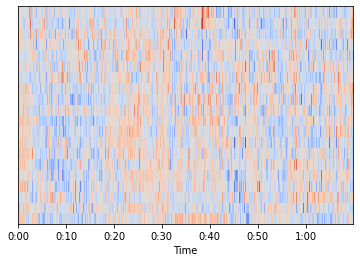

In [14]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

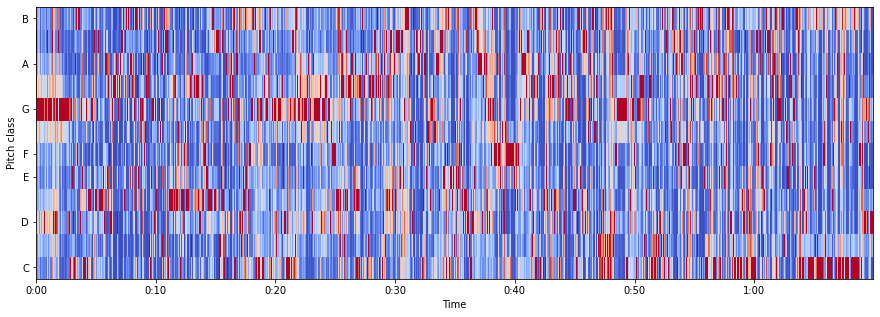

In [16]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')